### Linear Regression

#### Problem Statement

Predict the housing prices of a town or a suburb based on the features of the locality provided. Also identify most important features. 

#### Data Information

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

#### Import Necessary Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


#### Load the dataset

In [2]:
df = pd.read_csv("data/12_boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


#### Check the shape of the dataset

In [3]:
df.shape

(506, 13)

#### Get the info regarding column datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


#### Get summary statistics for the numerical columns

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

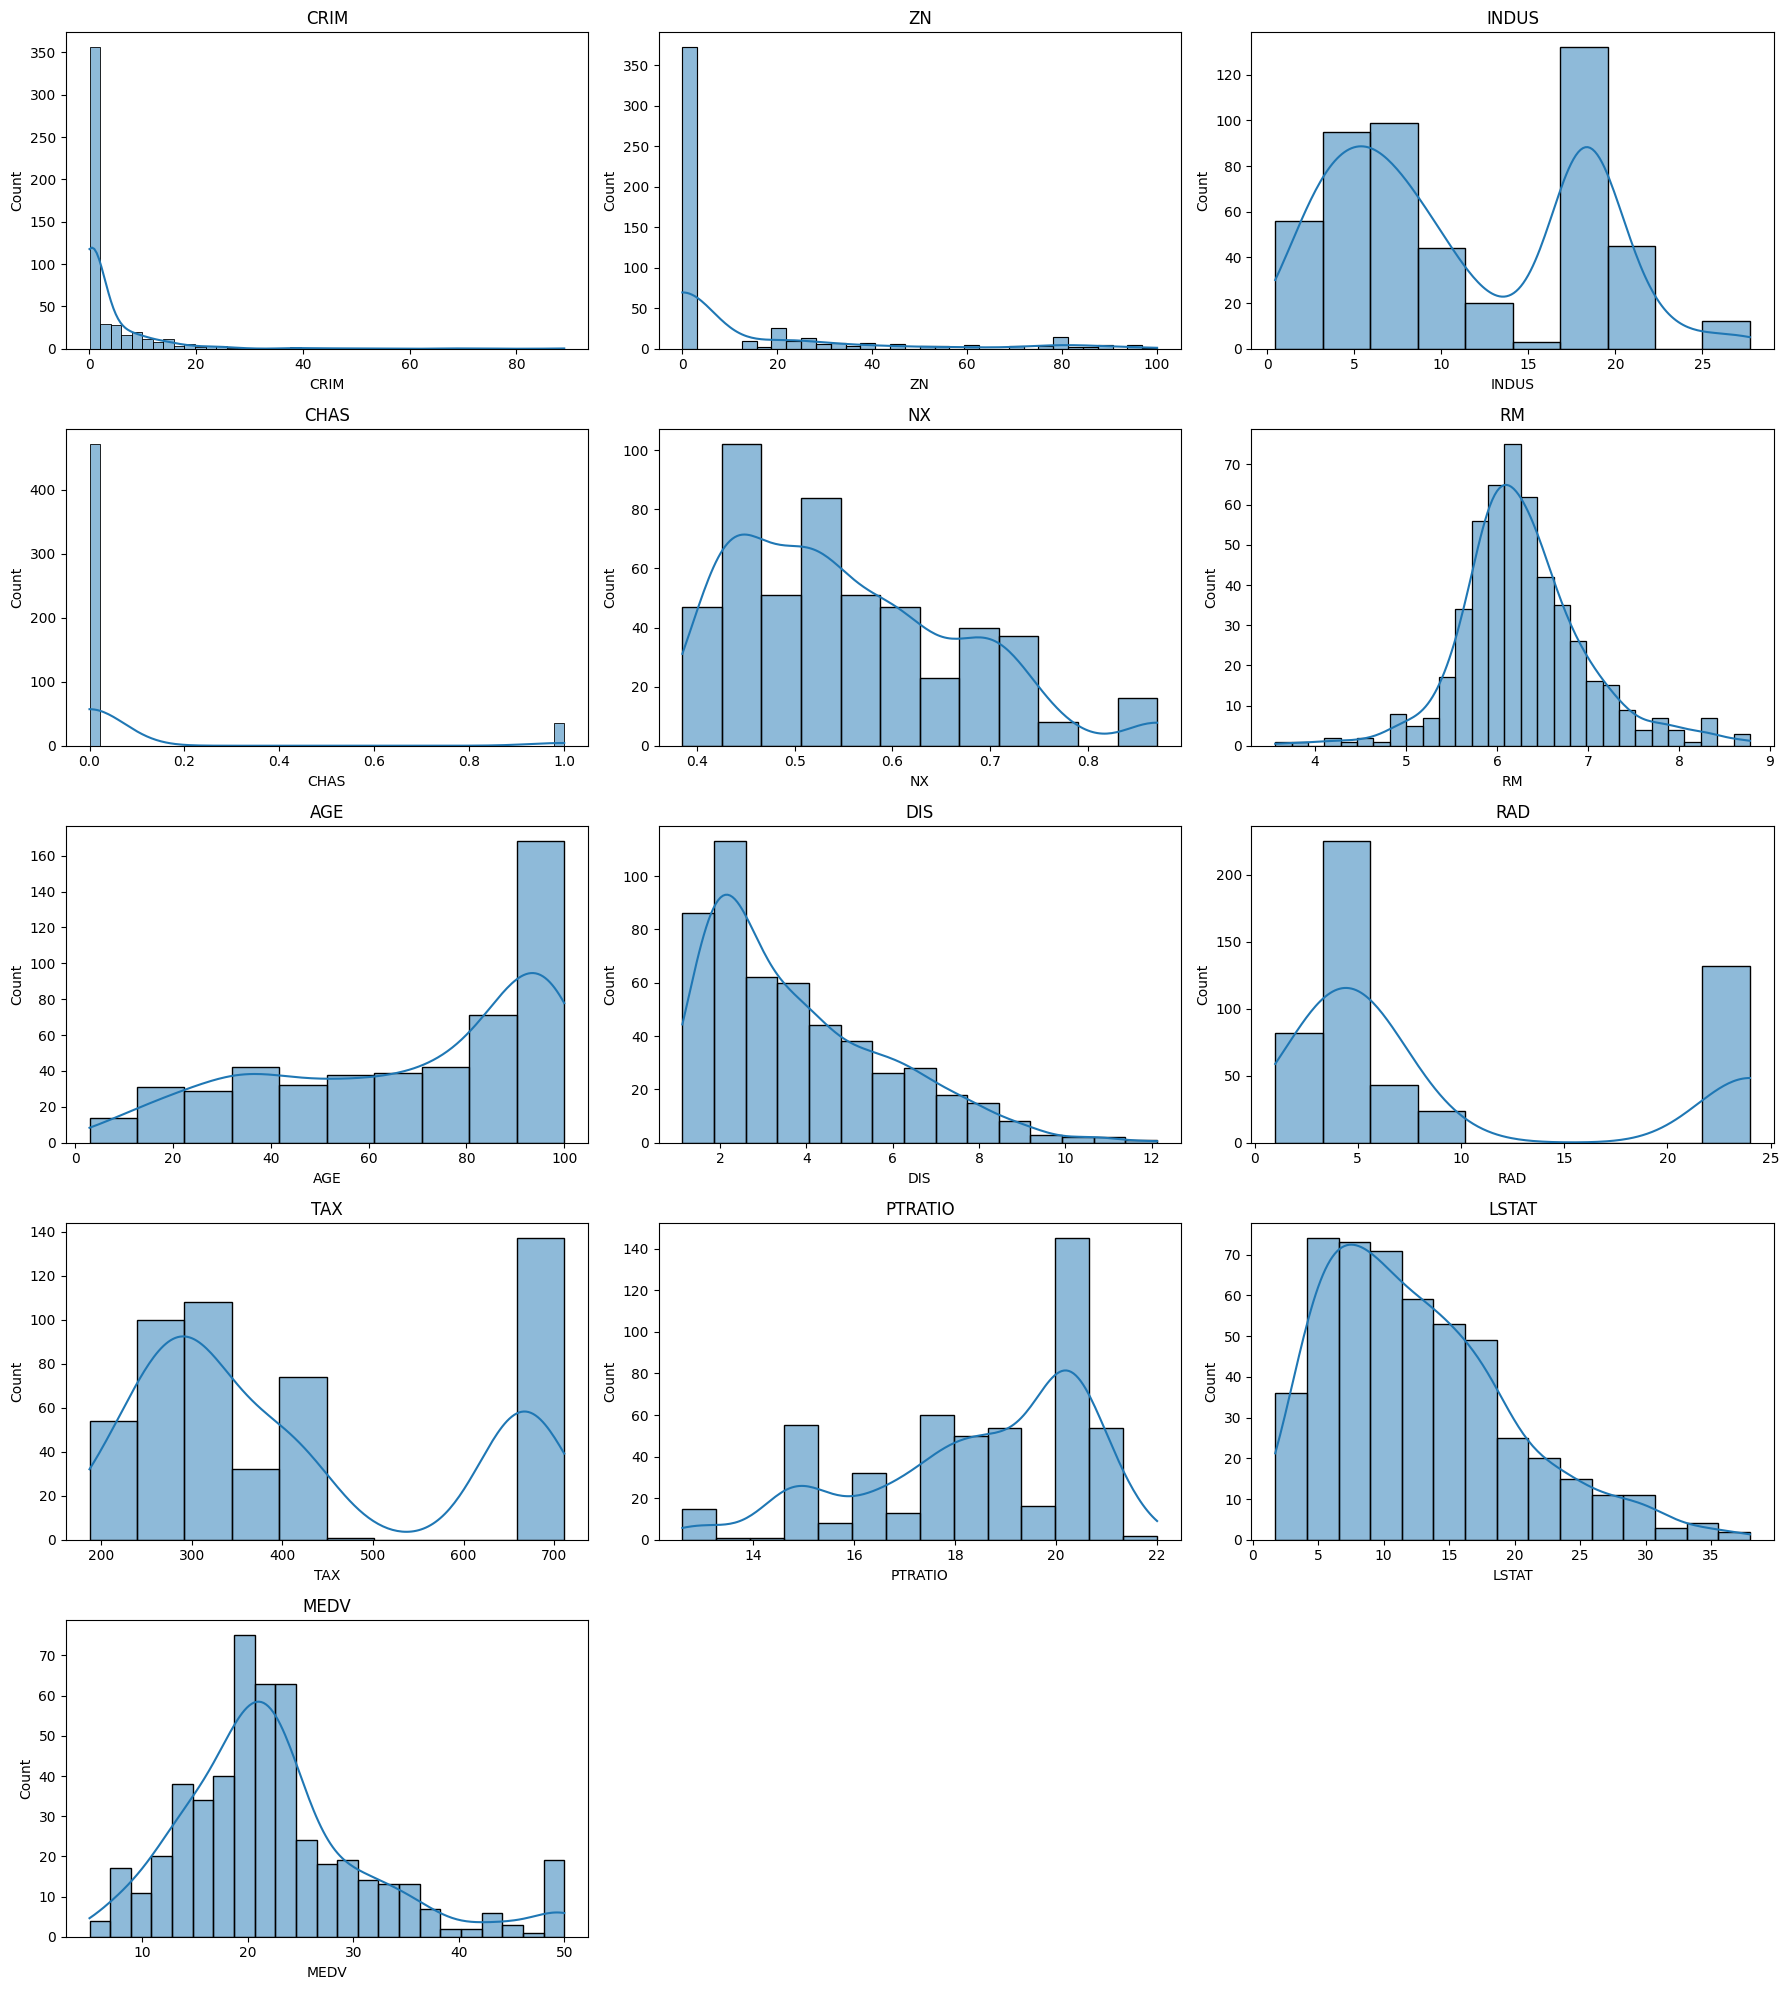

In [6]:
# Plot 3 histograms in a row for all columns in the dataframe
import math
num_cols = len(df.columns)
cols_per_row = 3
num_rows = math.ceil(num_cols / cols_per_row)
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row*6, num_rows*4))
axes = axes.flatten()
for idx, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(col)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplots
plt.tight_layout()
plt.show()

* CRIM and ZN have heavily skewed distributions.
* RM and MEDV have close to normal distributions.

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

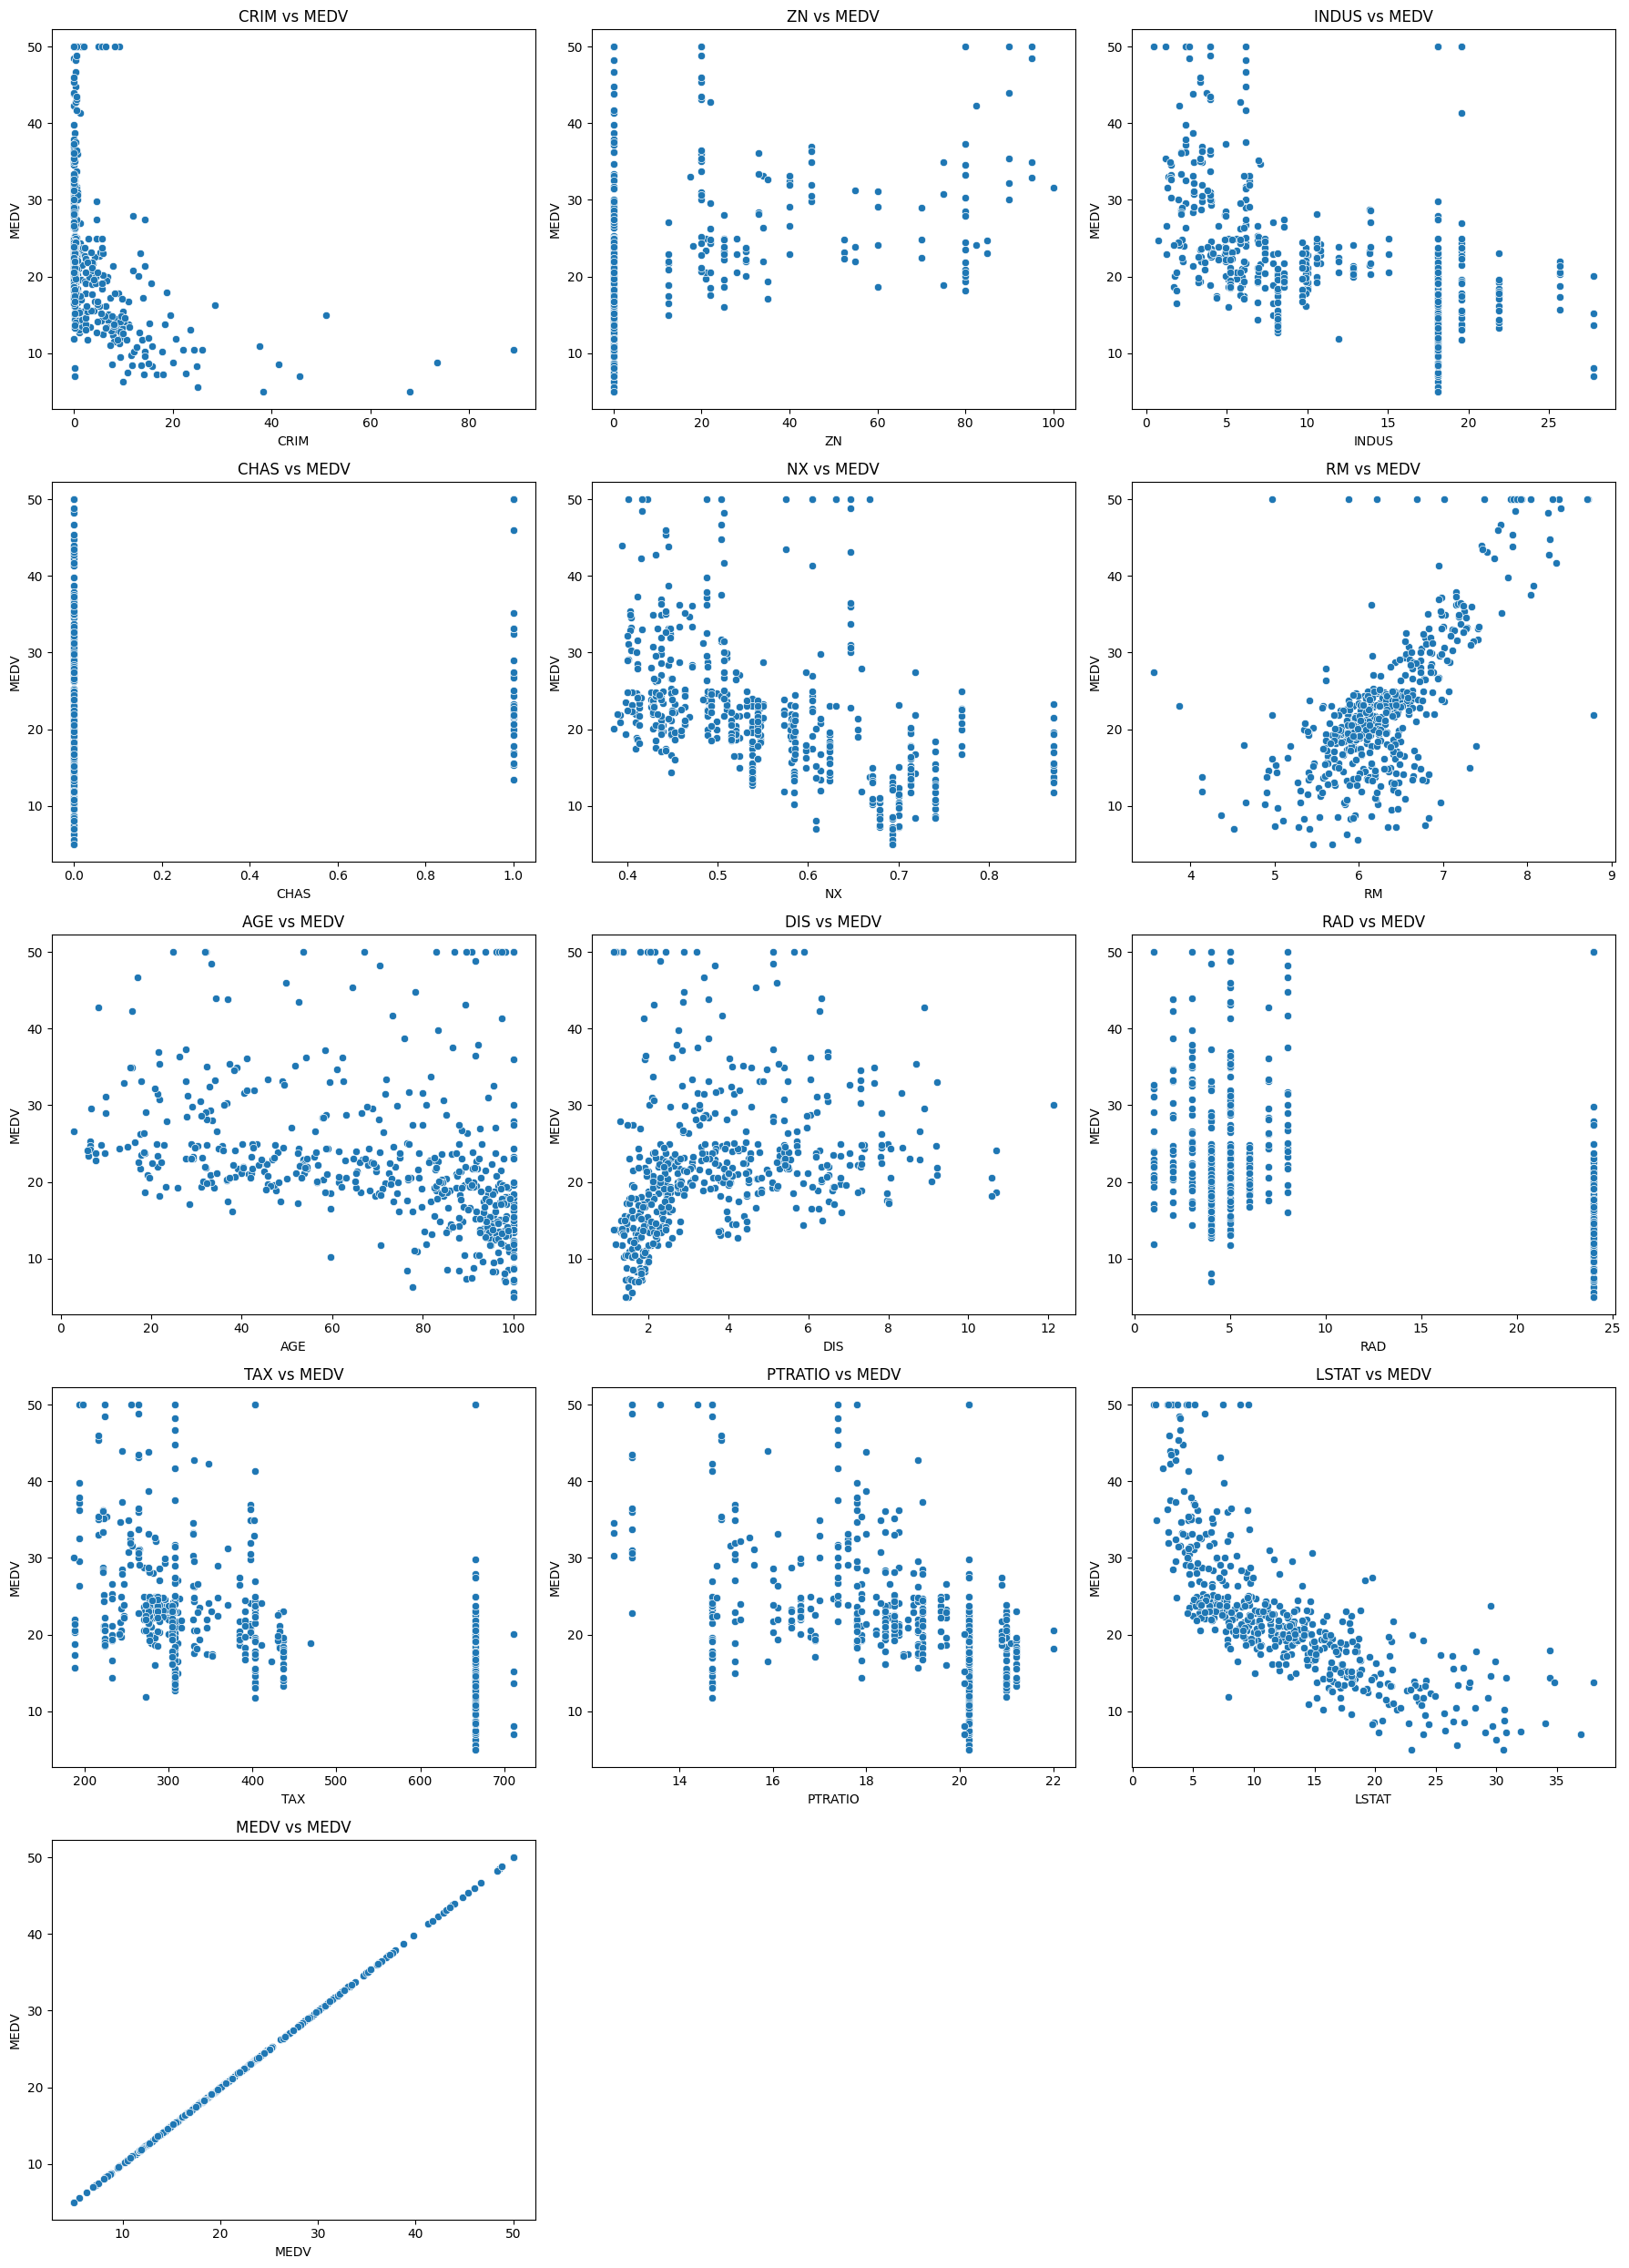

In [7]:
# Plot 3 scatterplots in a row for all features vs MEDV
import math
num_cols = len(df.columns)
cols_per_row = 3
num_rows = math.ceil(num_cols / cols_per_row)
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row*6, num_rows*5))
axes = axes.flatten()
for idx, col in enumerate(df.columns):
    sns.scatterplot(data=df, x=col, y="MEDV", ax=axes[idx])
    axes[idx].set_title(f"{col} vs MEDV")
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplots
plt.tight_layout()
plt.show()

* LSTAT and RM show a slightly strong linear relationship with MEDV.

**Plot the correlation heatmap and list your observations.**

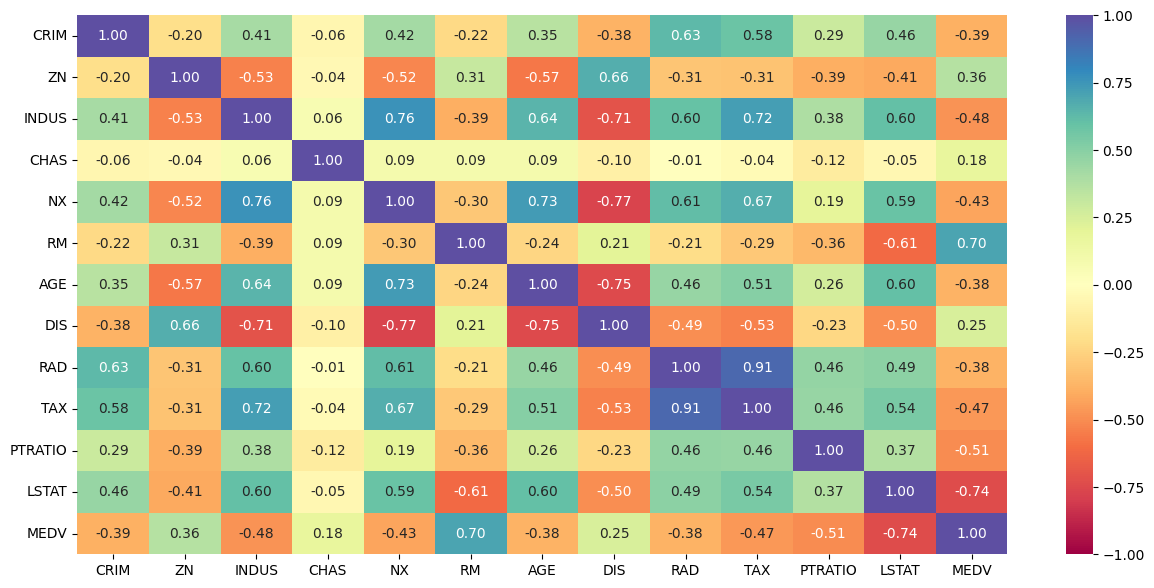

In [8]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* NX and TAX show a slightly strong positive linear relationship with INDUS, while DIS shows a slightly strong negative linear relationship with INDUS.
* NX shows a slightly strong positive linear relationship with AGE, while DIS shows a slightly strong negative linear relationship with AGE.
* RM shows a slightly strong positive linear relationship with MEDV, while LSTAT shows a slightly strong negative linear relationship with MEDV.

#### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [9]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [10]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#### Model Building (sklearn)

**Fit the model to the training set**

In [11]:
# intialize the model to be fit and fit the model on the train data

lm = LinearRegression()
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Evaluation

**R-squared (Coefficient of Determination)**
- Measures the proportion of variance in the target variable explained by the model
- Ranges from 0 to 1 (higher the better)
- Can be misleading if used alone - especially with non-linear data

In [12]:
print(f'The score (R-squared) on the training set is {lm.score(X_train, y_train):.3f}')
print(f'The score (R-squared) on the training set is {lm.score(X_test, y_test):.3f}')

The score (R-squared) on the training set is 0.707
The score (R-squared) on the training set is 0.772


**Write your own function for the R-squared score.**

In [13]:
def r_squared(model, X, y):
    y_mean = y.mean()
    SST = ((y - y_mean) ** 2).sum() # Total Sum of Squares
    SSE = ((y - model.predict(X)) ** 2).sum() # Sum of Squared Errors
    r_square = 1 - SSE / SST
    return SSE, SST, r_square

SSE, SST, r_square = r_squared(lm, X_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("R-squared: ", r_square)

SSE:  8410.365734587129
SST:  28740.928389830508
R-squared:  0.7073732058856179


**RMSE - Root Mean Squared Error**
- How far off predictions are from actual values, in the same units as target variable
- Squaring the errors means bigger mistakes hurt more
- Very sensitive to outliers

In [14]:
print(f'Root Mean Square Error (RMSE) of the model for the training set is {np.sqrt(mean_squared_error(y_train, lm.predict(X_train))):.4f}')
print(f'Root Mean Square Error (RMSE) of the model for the training set is {np.sqrt(mean_squared_error(y_test, lm.predict(X_test))):.4f}')

Root Mean Square Error (RMSE) of the model for the training set is 4.8742
Root Mean Square Error (RMSE) of the model for the training set is 4.5697


**MAE - Mean Absolute Error**
- Measured in the same units as the data, and is usually siilar in magnitude to, but slightly smaller than RMSE
- Average of absolute differences between predicted and actual values
- Easy to interpret, less sensitive to outliers

In [15]:
print(f'Mean Absolute Error (MAE) of the model for the training set is {mean_absolute_error(y_train, lm.predict(X_train)):.4f}')
print(f'Mean Absolute Error (MAE) of the model for the test set is {mean_absolute_error(y_test, lm.predict(X_test)):.4f}')

Mean Absolute Error (MAE) of the model for the training set is 3.3870
Mean Absolute Error (MAE) of the model for the test set is 3.4398


**Get the model coefficients.**

In [16]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lm.coef_, lm.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
CRIM,-0.113845
ZN,0.061170
INDUS,0.054103
CHAS,2.517512
NX,-22.248502
RM,2.698413
AGE,0.004836
DIS,-1.534295
RAD,0.298833
TAX,-0.011414


**Automate the equation of the fit**

In [17]:
# Let us write the equation of linear regression

Equation = "Price = " + str(lm.intercept_)
print(Equation, end=" ")

for i in range(len(X_train.columns)):
    if i != len(X_train.columns) - 1:
        print(
            "+ (",
            lm.coef_[i],
            ")*(",
            X_train.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", lm.coef_[i], ")*(", X_train.columns[i], ")")

Price = 49.885234663817315 + ( -0.11384484836914037 )*( CRIM )  + ( 0.061170268040606234 )*( ZN )  + ( 0.05410346495873903 )*( INDUS )  + ( 2.517511959122719 )*( CHAS )  + ( -22.248502345084393 )*( NX )  + ( 2.6984128200099287 )*( RM )  + ( 0.004836047284751638 )*( AGE )  + ( -1.534295381999262 )*( DIS )  + ( 0.298833254859015 )*( RAD )  + ( -0.011413580552024962 )*( TAX )  + ( -0.9889146257039395 )*( PTRATIO )  + ( -0.5861328508499127 )*( LSTAT )
